In [38]:
import numpy as np
import pandas as pd
import glob
import os

In [66]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Commands used to download files 

[Instaloader](https://instaloader.github.io/) was used for downloading the posts.Install the instaloader first to run this command. Run the following command  in command prompt. Fill the username section by your username of instagram, it will prompt from password in command prompt. 

The following command will download posts with hashtag "#workout" which is one of the most popular hashtags. 

## Installation
 One of the following
 - conda install instalaoder (its inside anaconda prompt)
 - pip install instaloader (recommended, beacuse u need to type password of insta)
 
## Command

$$instaloader --login=<username_instagram> --stories --highlights --no-profile-pic --no-pictures --no-compress-json --no-videos  --comments --geotags  --post-filter="date_utc >= datetime(2019, 5, 31)" --post-metadata-txt="{likes} likes, {comments} comments." --storyitem-metadata-txt=" {geotags} geotags. {stories} stories." "#workout"$$

## File types
Only post were used for this project but the command downloads four file variations with endings as follows:
- ..._UTC.json -> Files with all the info on post
- ..._UTC.txt -> FIles with info on just number of likes and comments
- ..._UTC_comments.json -> Files with comments on post
- ..._UTC_location.txt -> Files with location on the post

Only files ending on "_UTC.json"  were used in this project
    
## Columns used
From the files that returned json objects the following columns were chosen.
*The following columns are renamed and not as it is from the json file*

-  upload_format -> Uplaod Type, like image,video or sidecar
- likes_number -> NUmber of likes
- comments_number -> Number of Comments on the post
- address -> Address of the uploader
- owner_id -> User id of uploader
- owner_username -> Username of uploader
- product_type -> Type of post uploader like feed, igtv
- created_at -> Upload date in timestamp
- can_reshare -> Permisson to reshare the post
- able_to_comment -> Comments disabled or not




# List to hold values from json files


In [39]:
upload_format =[]
likes_number =[]
comments_number = []
address =[]
owner_id = []
owner_username= []
product_type = []
created_at = []
can_reshare =[]
able_to_comment = []

# Import All JSON's

In [40]:
# Absolute path to the folder
# Replace this path with your own
path_to_json = 'C:/Users/Lenovo/Documents/Integrify Works/Api and Scraping/#workout/Profiles' 

# Pattern of files to use
json_pattern = os.path.join(path_to_json,'*.json')
# List of file names
file_list = glob.glob(json_pattern)
for file in file_list:
    df = pd.read_json(file)
    
    # The following dict routes were tested from the files downloaded from instalaoder
    #Upload the relevent values in the lists
    upload_format.append(df["node"]["__typename"])
    likes_number.append( df["node"]["edge_liked_by"]["count"])
    comments_number.append(df["node"]["edge_media_to_comment"]["count"])
    owner_id.append( df["node"]["owner"]["id"])
    owner_username.append(df["node"]["owner"]["username"])
    created_at.append(df["node"]["taken_at_timestamp"])
    can_reshare.append(df["node"]["viewer_can_reshare"])
    able_to_comment.append(df["node"]["comments_disabled"])
    
    
    #FOllowing operation gave error
    #possibly due to missing data
    # So, i implemented try and catch
    try:
        # Try searching this
         df["node"]["product_type"]
    except:
        # IF error add nan to the list
        product_type.append(np.nan)
    else:  
        # If not error add the value
        product_type.append(df["node"]["product_type"])
        
    try:
        # Same logic as above
        df["node"]["location"]["name"]
    except:
        address.append(np.nan)
    else:         
        address.append(df["node"]["location"]["name"])



In [41]:
# Create df

df = pd.DataFrame({"upload_format":upload_format,
                   "likes_number":likes_number,
                   "comments_number":comments_number,
                   "address":address,
                   "owner_id":owner_id,
                   "owner_username":owner_username,
                   "product_type":product_type,
                   "created_at":created_at,
                   "can_reshare":can_reshare,
                   "comments_disabled":able_to_comment})


In [42]:
df.head()

,upload_format,likes_number,comments_number,address,owner_id,owner_username,product_type,created_at,can_reshare,comments_disabled
0,GraphVideo,984,72,"Melbourne, Victoria, Australia",6517270529,nikalemusic,feed,1578185613,True,False
1,GraphImage,277,4,Bergdorf Goodman,211402406,xy451,NaN,1578265568,True,False
2,GraphVideo,1578,108,"Melbourne, Victoria, Australia",6517270529,nikalemusic,feed,1579230454,True,False
3,GraphImage,309,1,Rosé Mansion,211402406,xy451,NaN,1579490733,True,False
4,GraphImage,164,6,Dominican Republic,514723745,littlemissbijou,NaN,1583703527,True,False


In [43]:
df.dtypes

upload_format        object
likes_number          int64
comments_number       int64
address              object
owner_id             object
owner_username       object
product_type         object
created_at            int64
can_reshare            bool
comments_disabled      bool
dtype: object

In [44]:

df.upload_format.unique()

array(['GraphVideo', 'GraphImage', 'GraphSidecar'], dtype=object)

# Data Tyding and Cleaning

## Upload Format Slicing

The upload_format column has word graph concatednated to each format types so lets remove that

In [45]:
# Slicing from the 5th will remove Graph
#i.e Change "GraphVideo" -> "Video"
df['upload_format'] = df['upload_format'].str.slice(5)

## Created_At -> DateTime

 The column created_at is a timestamp, so lets convert it into datetime and assing as index of dataframe

In [46]:
df['Date'] = pd.to_datetime(df['created_at'], unit='s')

# Set date as index
df.set_index("Date", drop=True,inplace=True)

#Also drop created at col
df.drop('created_at', inplace=True, axis=1)

In [47]:
df.head()

,upload_format,likes_number,comments_number,address,owner_id,owner_username,product_type,can_reshare,comments_disabled
Date,,,,,,,,,
2020-01-05 00:53:33,Video,984,72,"Melbourne, Victoria, Australia",6517270529,nikalemusic,feed,True,False
2020-01-05 23:06:08,Image,277,4,Bergdorf Goodman,211402406,xy451,NaN,True,False
2020-01-17 03:07:34,Video,1578,108,"Melbourne, Victoria, Australia",6517270529,nikalemusic,feed,True,False
2020-01-20 03:25:33,Image,309,1,Rosé Mansion,211402406,xy451,NaN,True,False
2020-03-08 21:38:47,Image,164,6,Dominican Republic,514723745,littlemissbijou,NaN,True,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 867 entries, 2020-01-05 00:53:33 to 2020-07-04 02:43:17
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   upload_format      867 non-null    object
 1   likes_number       867 non-null    int64 
 2   comments_number    867 non-null    int64 
 3   address            268 non-null    object
 4   owner_id           867 non-null    object
 5   owner_username     867 non-null    object
 6   product_type       172 non-null    object
 7   can_reshare        867 non-null    bool  
 8   comments_disabled  867 non-null    bool  
dtypes: bool(2), int64(2), object(5)
memory usage: 55.9+ KB


## Dealing With Address Missing Values

 Lets check if the unique values of user_id and username columns can help filling missing values of address by masking.

lets check if some usernames have both missing and non-missing address

In [88]:
# It will give unique value counts by username and id
x = df.groupby('owner_username').nunique(dropna=False)
y = df.groupby('owner_id').nunique(dropna=False)

In [90]:
# Value counts more than 1 means we have null values as well
print(x[x['address']>1].shape[0])
print(y[y['address']>1].shape[0])

10
10


It seems we can replace atleast 10 nans with addresses.More if the username and user_id share different missing value index for address.

In [63]:
sorted_by_owners = df.sort_values(['owner_id','owner_username'])

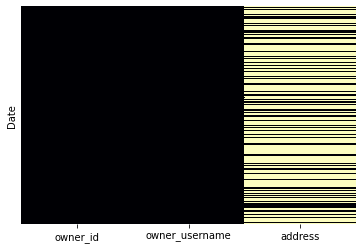

In [69]:
sns.heatmap(sorted_by_owners.isnull()[['owner_id','owner_username','address']], cbar=False,cmap="magma", yticklabels=False)

### Create Function that uses Masks

lets define a function that checks the condition: If address is null, and id and username are not null, and fills value accordingly. 

Function fill_address will take two arguments, 
- First will be  list of columns i.e either["address","owner_id"]  or ["address","owner_username"] with address being first order. Function will be used with df.apply method so order matters.

- Second argument will be context. Its going to help function determine where we are dealing with owner_id or owner_username. So, only provide two values to context either "user_id" or "username".



In [107]:
# value_set_1 = df.groupby('user_id').unique()
# Create a dictionary with user_id and address as key value pair 
value_set_1 = dict(df.groupby('owner_id')['address'].unique())

# to extract value we should use value_set_1[id][0]

value_set_2 = dict(df.groupby('owner_username')['address'].unique())
# to extract value we should use value_set_2[username][0]



In [130]:
value_set_2["2019msgu2017lkmtkaambassador"][0]

nan

In [133]:
value_set_1["10002699383"][0]

nan

In [125]:
type(df.owner_id[0])

str

In [ ]:
# np.isnan wont work so math.isnan is required
import math

But first lets make nan checker function. Math.nan only checks nan for numeric types not string, so we have to workaround that logic

In [152]:
# Function logic
# if we convert a srting into float it will raise error
#but for nan values it won't raise error.
# Which means if error is raised the value is string and not a null, 
# Since we want to find if the value is null or not
#so we can return False for the string as it is not null and rasises error
#while return true for nan
def nan_checker_for_strings(val):
    #let use try except:
    try:
        # it wont raise error for null so its
        math.isnan(float(val))
    except:
        # if error, means its string so not a null hence return false
        return False
    
    else:
        return True

In [153]:
def fill_address(col, context):
    address = col[0]
    filling_val=col[1]
    
    # Assgin by context
    # Assgin values to missing addresses by contest
    if context == "user_id":
        #if the address is missing assign value from set 1
        #use nan checker fuction here
        if nan_checker_for_strings(address):
            #If user_id use value_Set_1 cause we used owner_id for value_set_1
            return value_set_1[filling_val][0]
        else:
            #if address is not missing return as it is
            return address
    #Now for the context username
    else:
         #if the address is missing assign value from set 2
        if nan_checker_for_strings(address):
            #If username is context, use value_Set_2 cause we used username for value_set_2
            return value_set_2[filling_val][0]
        else:
            #if address is not missing return as it is
            return address
    
    

In [111]:
#apply aboove function

In [154]:
# The first argument for fill address comes from df[['address',"owner_id"]] as list of two values
# second argumnet context should be provided like below
df['address'] = df[['address',"owner_id"]].apply(fill_address, context="user_id", axis=1)
df['address'] = df[['address',"owner_username"]].apply(fill_address, context="username", axis=1)

In [157]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 867 entries, 2020-01-05 00:53:33 to 2020-07-04 02:43:17
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   upload_format      867 non-null    object
 1   likes_number       867 non-null    int64 
 2   comments_number    867 non-null    int64 
 3   address            867 non-null    object
 4   owner_id           867 non-null    object
 5   owner_username     867 non-null    object
 6   product_type       867 non-null    object
 7   can_reshare        867 non-null    bool  
 8   comments_disabled  867 non-null    bool  
dtypes: bool(2), int64(2), object(5)
memory usage: 95.9+ KB


Though not a lot we did manage to fill about 42 missing values. Lets fill the remaining with unknown.

### Fill Remaining values with Unkown

In [156]:
df.fillna("unknown", inplace=True)